In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../DATA/penguins_size.csv")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [10]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [11]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [12]:
df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [13]:
df = df[df['sex'] != '.']

In [14]:
df['sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

<Axes: xlabel='culmen_depth_mm', ylabel='flipper_length_mm'>

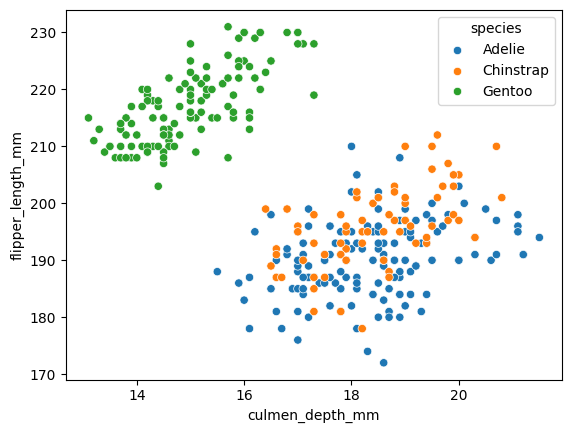

In [16]:
sns.scatterplot(data = df, x='culmen_depth_mm', y='flipper_length_mm', hue='species')

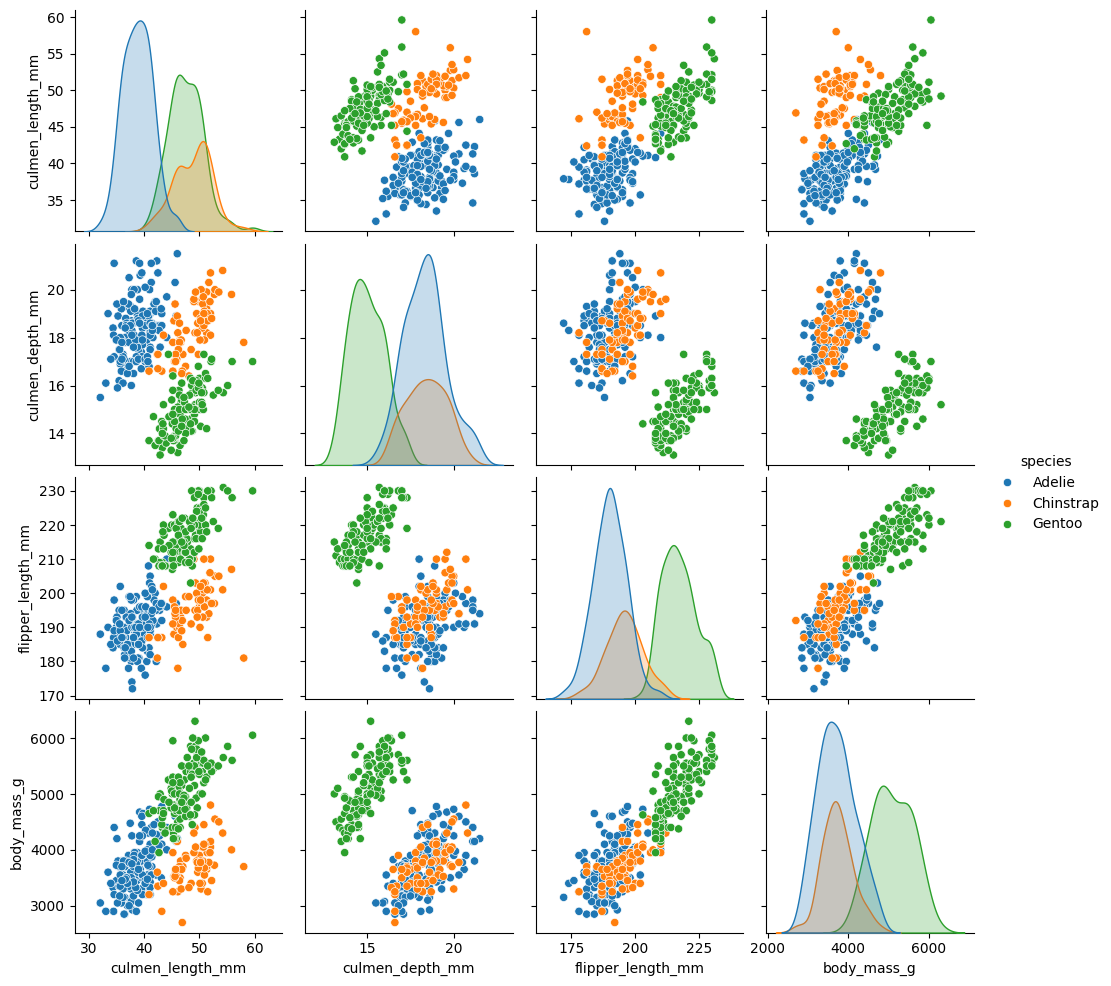

In [17]:
sns.pairplot(data = df, hue='species')

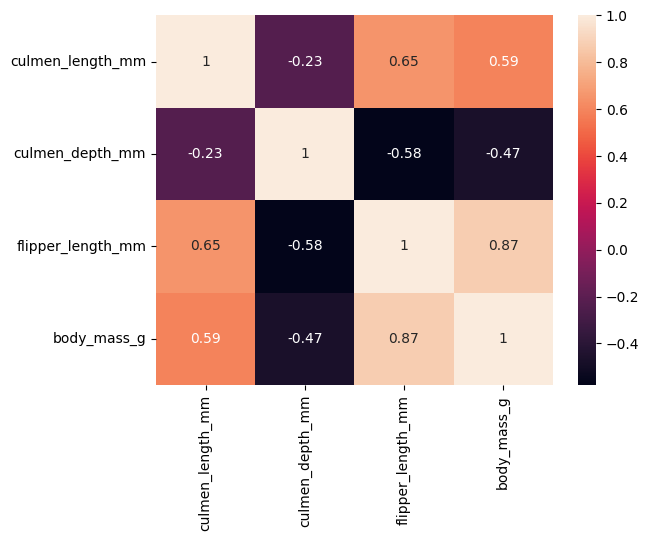

In [19]:
sns.heatmap(data=df.drop(['species', 'island', 'sex'], axis=1).corr(), annot=True)

plt.show()

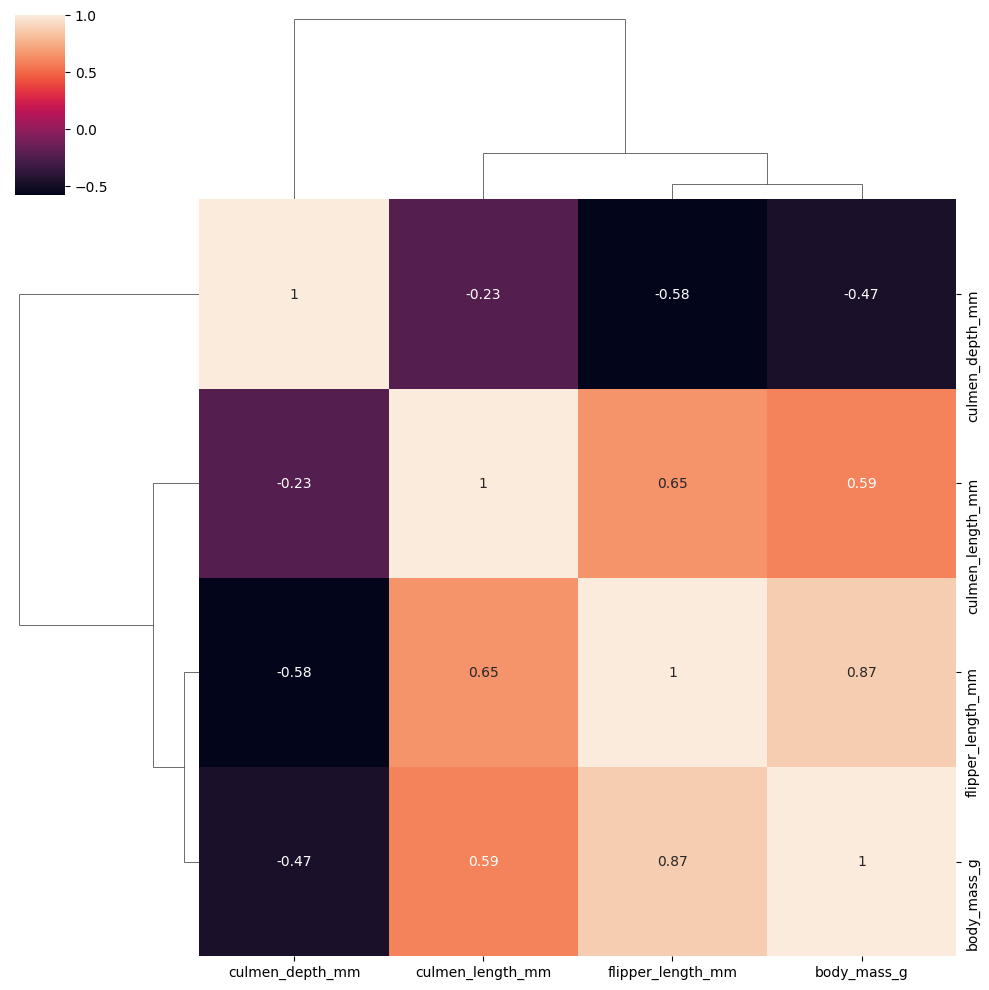

In [21]:
sns.clustermap(data=df.drop(['species', 'island', 'sex'], axis=1).corr(), annot=True)

plt.show()

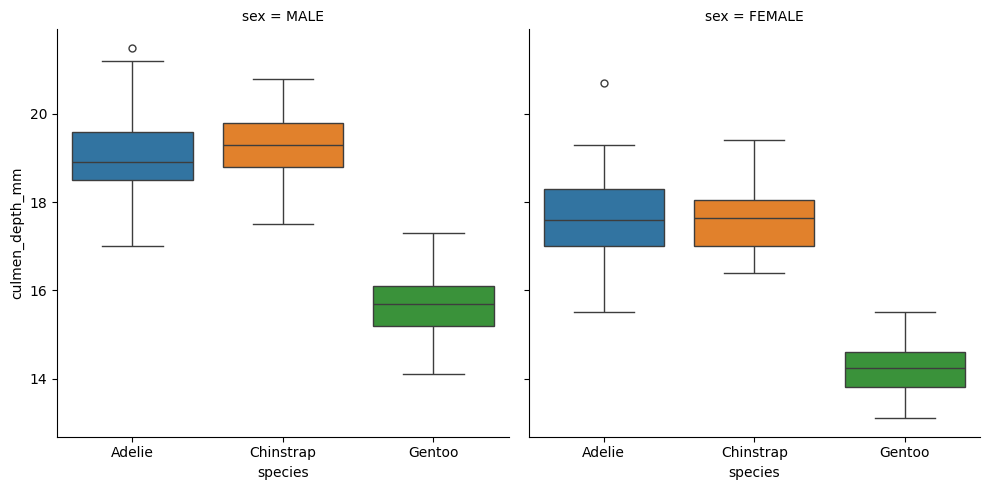

In [25]:
sns.catplot(data=df, x='species', y='culmen_depth_mm', kind='box', hue='species', col='sex')

In [27]:
X = pd.get_dummies(df.drop('species', axis=1), drop_first=True).astype(int)

In [28]:
y = df['species']

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
model = RandomForestClassifier(n_estimators=120, max_features='log2', random_state=101)

In [58]:
model.fit(X_train, y_train)

RandomForestClassifier(max_features='log2', n_estimators=120, random_state=101)

In [59]:
y_predicted = model.predict(X_test)

In [60]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [62]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[39,  1,  0],
       [ 1, 26,  0],
       [ 0,  0, 33]])

In [63]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

      Adelie       0.97      0.97      0.97        40
   Chinstrap       0.96      0.96      0.96        27
      Gentoo       1.00      1.00      1.00        33

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



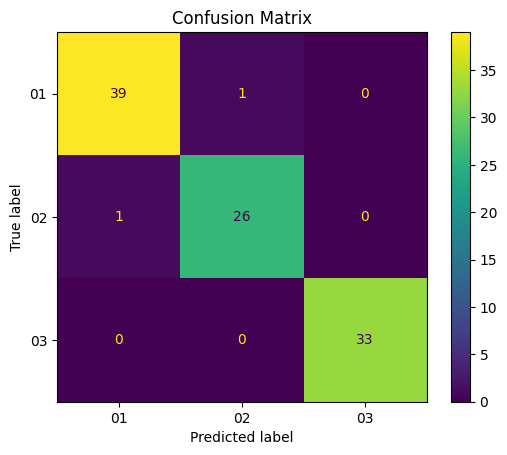

In [65]:
disp = ConfusionMatrixDisplay(cm, display_labels=['01', '02', '03'])
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [75]:
pd.DataFrame(model.feature_importances_, columns=['importance'])

,importance
0,0.352118
1,0.126878
2,0.239605
3,0.157096
4,0.092301
5,0.022445
6,0.009557
